In [ ]:
import gdown
import math
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
nombre_carpeta = "datos"

ruta_dataset = os.path.join(os.getcwd(), nombre_carpeta)

if not os.path.exists(ruta_dataset):
    os.makedirs(ruta_dataset)
    print(f"Carpeta '{nombre_carpeta}' creada en: {ruta_dataset}")
else:
    print(f"La carpeta '{nombre_carpeta}' ya existe en: {ruta_dataset}")

La carpeta 'datos' ya existe en: /home/jarcos/datos


In [ ]:
id_dataset_original = '1Dkwu9-P7MhineLZZawDnmYMBSM2ap02b'
id_dataset_modified = '1OuJHPpn2Wv5EhlL1J98HWYyPJM-iL8Ds'

energy_original = 'energy_original.cvs'
energy_modified = 'energy_modified.cvs'

ruta_original = os.path.join(ruta_dataset, energy_original)
ruta_modified = os.path.join(ruta_dataset, energy_modified)

gdown.download(id=id_dataset_original, output=ruta_original, quiet=True)
gdown.download(id=id_dataset_modified, output=ruta_modified, quiet=True)

'/home/jarcos/datos/energy_modified.cvs'

# 1. Analisis de Requerimientos

**Características del dataset**

Esta información proviene de un estudio que evaluó los requisitos de carga térmica para calefacción y refrigeración en edificios, es decir, su eficiencia energética, en función de diversos parámetros arquitectónicos.
El conjunto de datos, disponible en la siguiente liga, fue generado a partir de un análisis energético que consideró 12 configuraciones distintas de edificios, simuladas mediante el software Ecotect.
Las edificaciones varían en aspectos como el área de acristalamiento, la distribución de dicha área y la orientación, entre otros parámetros relevantes.

El conjunto de datos se describe en el texto académico llamado *Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools* (Tsanasa & Xifarab, 2012).

Estos datos provienen de simulaciones de edificios residenciales realizadas con software especializado llamado **Ecotect**. Se diseñaron distintas formas de construcción manteniendo el mismo volumen, pero variando superficies, orientaciones y proporción de ventanas. También se consideraron diferentes materiales y condiciones internas típicas de uso residencial.

El Dataset original contiene **768** configuraciones de edificios, cada una caracterizada por variables como la compacidad (**X1**), el área de superficie (**X2**), pared (**X3**), techos (**X4**), altura total (**X5**), orientación (**X6**), área de acristalamiento (**X7**) y distribución de área de acristalamiento (**X8**). Para cada caso se calcularon dos resultados principales: la carga de calefacción (**Heating Load** o **HL**, representada como **Y1**) y la carga de enfriamiento (**Cooling Load** o **CL**, representada como **Y2**), que sirven como referencia para evaluar el desempeño energético.


Liga de la información del dataset [Rendimiento energético](https://archive.ics.uci.edu/dataset/242/energy+efficiency)



<table border="1">
  <thead>
    <tr>
      <th>Nombre de la variable</th>
      <th>Rol</th>
      <th>Tipo</th>
      <th>Descripción</th>
      <th>Unidades</th>
      <th>Valores faltantes</th>
      <th>Valores Únicos (Dataset original)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>X1</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Compacidad relativa</td>
      <td></td>
      <td>No</td>
      <td>12</td>
    </tr>
    <tr>
      <td>X2</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Área de superficie</td>
      <td></td>
      <td>No</td>
      <td>12</td>
    </tr>
    <tr>
      <td>X3</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Área de pared</td>
      <td></td>
      <td>No</td>
      <td>7</td>
    </tr>
    <tr>
      <td>X4</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Área del techo</td>
      <td></td>
      <td>No</td>
      <td>4</td>
    </tr>
    <tr>
      <td>X5</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Altura total</td>
      <td></td>
      <td>No</td>
      <td>2</td>
    </tr>
    <tr>
      <td>X6</td>
      <td>Característica</td>
      <td>Entero</td>
      <td>Orientación</td>
      <td></td>
      <td>No</td>
      <td>4</td>
    </tr>
    <tr>
      <td>X7</td>
      <td>Característica</td>
      <td>Continuo</td>
      <td>Área de acristalamiento</td>
      <td></td>
      <td>No</td>
      <td>4</td>
    </tr>
    <tr>
      <td>X8</td>
      <td>Característica</td>
      <td>Entero</td>
      <td>Distribución del área de acristalamiento</td>
      <td></td>
      <td>No</td>
      <td>6</td>
    </tr>
    <tr>
      <td>Y1</td>
      <td>Blanco</td>
      <td>Continuo</td>
      <td>Carga de calefacción</td>
      <td></td>
      <td>No</td>
      <td>586</td>
    </tr>
    <tr>
      <td>Y2</td>
      <td>Blanco</td>
      <td>Continuo</td>
      <td>Carga de enfriamiento</td>
      <td></td>
      <td>No</td>
      <td>636</td>
    </tr>
  </tbody>
</table>


In [ ]:
df_original = pd.read_csv(ruta_original,sep=',')
df_modified = pd.read_csv(ruta_modified,sep=',')

In [ ]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X1              776 non-null    object 
 1   X2              774 non-null    object 
 2   X3              776 non-null    object 
 3   X4              776 non-null    object 
 4   X5              767 non-null    object 
 5   X6              772 non-null    object 
 6   X7              771 non-null    object 
 7   X8              772 non-null    float64
 8   Y1              777 non-null    object 
 9   Y2              777 non-null    object 
 10  mixed_type_col  696 non-null    object 
dtypes: float64(1), object(10)
memory usage: 67.4+ KB


In [ ]:
df_modified.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X1,776,31,0.79,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,774,32,637.0,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3,776,25,294.0,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,776,19,220.5,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,767,16,7.0,362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,772,20,4.0,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X7,771,16,0.4,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X8,772.0,NaN,NaN,NaN,5.200777,40.220112,0.0,1.0,3.0,4.0,971.0
Y1,777,596,15.16,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,777,645,14.28,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Manipulación y preparación de datos (Aplicación de *EDA*)

## 2.1. Estructura de los datos

In [ ]:
def show_stats(df):
    """
    Muestra un resumen estadístico y descriptivo de un DataFrame de metadatos de archivos.

    Parámetros:
        df (pd.DataFrame) : DataFrame que contiene información de archivos.

    Retorno:
        None : La función imprime resultados directamente y no retorna valor.
    """

    # 1) Mostrar forma del DataFrame
    print('\n=== Forma (Filas, Columnas) ===\n')
    print(df.shape)

    # 2) Mostrar tipos de datos de cada columna
    print('\n=== Tipos de Datos ===\n')
    display(df.dtypes)

    # 3) Resumen de la estructura
    print('\n=== Resumen de la Estructura ===\n')
    display(df.info())

    # 4) Mostrar estadísticas descriptivas para todas las columnas
    print('\n=== Estadísticas Descriptivas ===\n')
    display(df.describe(include='all').T)

    # 5) Conteo de valores únicos por columna
    print('\n=== Conteo de Valores Únicos ===\n')
    display(df.nunique().sort_values(ascending=False))

In [ ]:
print(f"*** Análisis de la estructura de datos ***")

show_stats(df_modified)

*** Análisis de la estructura de datos ***

=== Forma (Filas, Columnas) ===

(783, 11)

=== Tipos de Datos ===



X1                 object
X2                 object
X3                 object
X4                 object
X5                 object
X6                 object
X7                 object
X8                float64
Y1                 object
Y2                 object
mixed_type_col     object
dtype: object


=== Resumen de la Estructura ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X1              776 non-null    object 
 1   X2              774 non-null    object 
 2   X3              776 non-null    object 
 3   X4              776 non-null    object 
 4   X5              767 non-null    object 
 5   X6              772 non-null    object 
 6   X7              771 non-null    object 
 7   X8              772 non-null    float64
 8   Y1              777 non-null    object 
 9   Y2              777 non-null    object 
 10  mixed_type_col  696 non-null    object 
dtypes: float64(1), object(10)
memory usage: 67.4+ KB


None


=== Estadísticas Descriptivas ===



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X1,776,31,0.79,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,774,32,637.0,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3,776,25,294.0,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,776,19,220.5,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,767,16,7.0,362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,772,20,4.0,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X7,771,16,0.4,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X8,772.0,NaN,NaN,NaN,5.200777,40.220112,0.0,1.0,3.0,4.0,971.0
Y1,777,596,15.16,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,777,645,14.28,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== Conteo de Valores Únicos ===



Y2                645
Y1                596
mixed_type_col    423
X2                 32
X1                 31
X3                 25
X6                 20
X4                 19
X5                 16
X7                 16
X8                 10
dtype: int64

El resumen anterior indica que el conjunto de datos contiene $11$ características y un total de $783$ registros. Además, se observa que todas las columnas presentan valores faltantes en distinta proporción.

Asimismo, los tipos de datos revelan que los registros no son completamente numéricos, lo que sugiere la presencia de valores tipo cadena (`string`) u otros formatos no estructurados.

Por lo tanto, el primer paso será realizar una limpieza de datos. Dado el tamaño del conjunto, se optará por imputar los valores faltantes utilizando la media como estrategia inicial.


## 2.2. Análisis univariante

### a) Limpieza e imputación de datos faltantes

**Proceso de limpieza e imputación de valores faltantes:**
1. Como primer paso, se reemplazarán las celdas vacías o que contienen únicamente espacios en blanco por el valor `NaN`.
2. A continuación, se intentará convertir todas las columnas a tipo numérico; aquellos valores que no puedan transformarse serán también convertidos en `NaN`.
3. Finalmente, los valores faltantes se imputarán utilizando la $media$ de cada columna como estrategia de completado.


In [ ]:
def clean_process(df):
    """
    Duplica el DataFrame, convierte strings vacíos a NaN,
    fuerza conversión a valores numéricos y finalmente
    imputa valores NaN con la media de cada columna.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.

    Retorno:
        pd.DataFrame: DataFrame limpio y numérico.
    """

    #duplicamos df
    df_copy = df.copy()

    #reemplazar string por NaN
    df_copy.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    #convertir a numericos
    df_num = df_copy.apply(pd.to_numeric, errors='coerce')

    #imputar los NaN a la media
    df_clean = df_num.fillna(df_num.mean())

    return df_clean

In [ ]:
df_clean = clean_process(df_modified)

print(f"*** Análisis de la estructura de datos después del proceso de limpieza ***")

show_stats(df_clean)

*** Análisis de la estructura de datos después del proceso de limpieza ***

=== Forma (Filas, Columnas) ===

(783, 11)

=== Tipos de Datos ===



X1                float64
X2                float64
X3                float64
X4                float64
X5                float64
X6                float64
X7                float64
X8                float64
Y1                float64
Y2                float64
mixed_type_col    float64
dtype: object


=== Resumen de la Estructura ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X1              783 non-null    float64
 1   X2              783 non-null    float64
 2   X3              783 non-null    float64
 3   X4              783 non-null    float64
 4   X5              783 non-null    float64
 5   X6              783 non-null    float64
 6   X7              783 non-null    float64
 7   X8              783 non-null    float64
 8   Y1              783 non-null    float64
 9   Y2              783 non-null    float64
 10  mixed_type_col  783 non-null    float64
dtypes: float64(11)
memory usage: 67.4 KB


None


=== Estadísticas Descriptivas ===



,count,mean,std,min,25%,50%,75%,max
X1,783.0,2.547713,34.720229,0.62,0.69,0.760000,0.860,902.62
X2,783.0,777.653946,1868.680545,514.50,612.50,686.000000,759.500,46893.00
X3,783.0,372.516234,939.937736,245.00,294.00,318.500000,343.000,24622.50
X4,783.0,228.403299,714.411188,110.25,147.00,220.500000,220.500,15214.50
X5,783.0,12.270942,66.460519,3.50,3.50,7.000000,7.000,955.50
X6,783.0,7.875325,44.554172,2.00,3.00,4.000000,5.000,776.00
X7,783.0,2.138427,27.008890,0.00,0.10,0.250000,0.400,516.00
X8,783.0,5.200777,39.936232,0.00,1.00,3.000000,4.000,971.00
Y1,783.0,28.055188,75.615745,6.01,13.02,19.480000,32.105,1676.70
Y2,783.0,39.055181,171.595519,10.90,15.77,24.770000,33.770,3665.13



=== Conteo de Valores Únicos ===



Y2                632
Y1                583
mixed_type_col    422
X2                 20
X1                 19
X3                 17
X6                 15
X4                 14
X5                 13
X7                 12
X8                 11
dtype: int64

### b) Análisis e imputación de valores atípicos

Una vez imputados los valores faltantes, se procederá a identificar posibles valores atípicos en las variables numéricas. Para ello, se utilizará una visualización mediante gráficos de caja (boxplots), que permiten detectar desviaciones significativas respecto a la distribución central de cada variable.
La detección se basará en el método del rango intercuartílico (IQR), calculando los límites inferior y superior como:

$$\text{Límite inferior} = Q_1 - 1.5 \times IQR \quad \text{y} \quad \text{Límite superior} = Q_3 + 1.5 \times IQR$$

Los valores que se encuentren fuera de estos rangos serán considerados atípicos. En lugar de eliminarlos, se optará por una estrategia de imputación, reemplazando dichos valores por la media de la variable correspondiente. Esta decisión busca preservar la integridad del conjunto de datos sin introducir sesgos extremos, manteniendo una distribución más estable para análisis posteriores.

In [ ]:
def boxplots(df):
  columnas = df.columns

  fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 8))
  axes = axes.flatten()

  for i, col in enumerate(columnas):
    df[[col]].plot(kind='box',
                         patch_artist=True,
                         color=dict(boxes='lightblue', whiskers='gray', medians='red'),
                         ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel('Valor')
    axes[i].grid(True)

  if len(axes) > len(columnas):
      axes[-1].axis('off')

  plt.tight_layout()
  plt.show()

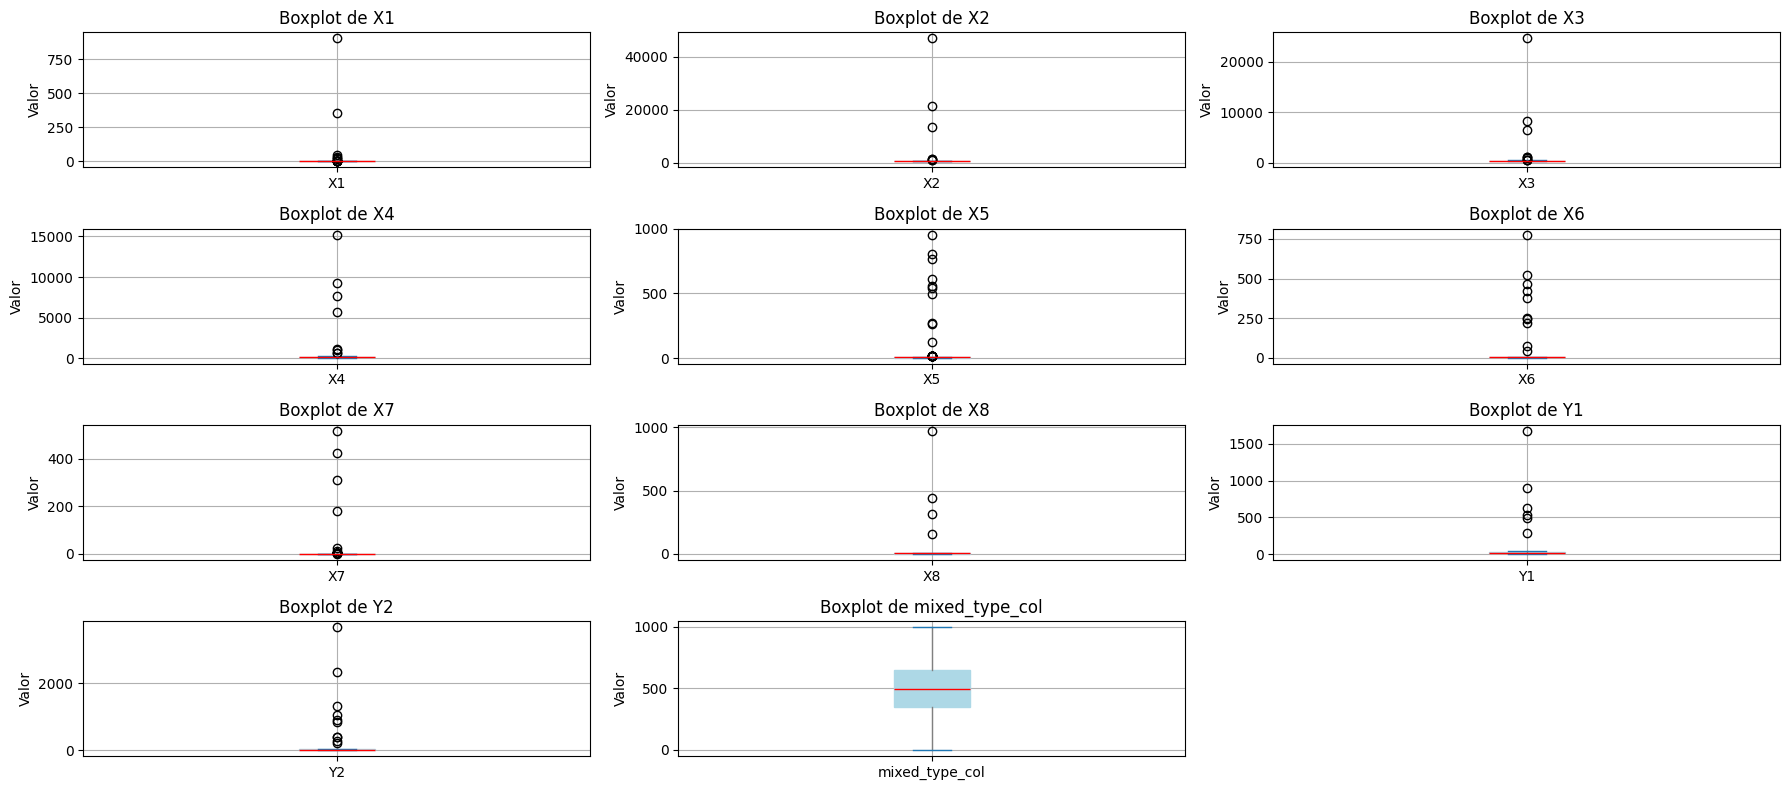

In [ ]:
boxplots(df_clean)

In [ ]:
def analyze_data_spread(df):
    """
    Analiza los valores atípicos (outliers) de todas las columnas numéricas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR).

    Para cada columna calcula:
        - IQR
        - Límite inferior
        - Límite superior
        - Número de outliers

    Muestra un DataFrame con los resultados y no retorna nada.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
    """
    results = []

    for column in df.columns:
        data = df[column].dropna()
        if data.empty or not np.issubdtype(data.dtype, np.number):
            results.append({
                "Columna": column,
                "IQR": np.nan,
                "Límite Inf.": np.nan,
                "Límite Sup.": np.nan,
                "Outliers": 0
            })
            continue

        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_count = ((data < lower_bound) | (data > upper_bound)).sum()

        results.append({
            "Columna": column,
            "IQR": iqr,
            "Límite Inf.": lower_bound,
            "Límite Sup.": upper_bound,
            "Outliers": outlier_count
        })

    result_df = pd.DataFrame(results).set_index("Columna")

    display(result_df)

In [ ]:
print("*** Análisis de Valores Atípicos, IQR y Límites ***")

analyze_data_spread(df_clean)

*** Análisis de Valores Atípicos, IQR y Límites ***


,IQR,Límite Inf.,Límite Sup.,Outliers
Columna,,,,
X1,0.170,0.4350,1.1150,15
X2,147.000,392.0000,980.0000,7
X3,49.000,220.5000,416.5000,9
X4,73.500,36.7500,330.7500,8
X5,3.500,-1.7500,12.2500,29
X6,2.000,0.0000,8.0000,10
X7,0.300,-0.3500,0.8500,21
X8,3.000,-3.5000,8.5000,4
Y1,19.085,-15.6075,60.7325,6


In [ ]:
def analyze_distribution(df):
    """
    Analiza la distribución de las columnas numéricas de un DataFrame calculando
    asimetría (skew) y curtosis (kurtosis), y clasificando su tipo.

    Parámetros:
        df (pd.DataFrame) : DataFrame con columnas numéricas. La columna 'name' se excluye.

    Retorno:
        None : La función muestra un DataFrame resumen directamente.
    """

    # 1) Preparación del DataFrame
    results = {}

    # 2) Iteración sobre cada columna numérica
    for column in df.columns:
        data = df[column].dropna() # Eliminar valores NaN
        skew_val = skew(data)           # Cálculo de asimetría
        kurt_val = kurtosis(data)       # Cálculo de curtosis

        # 3) Clasificación de asimetría
        if skew_val < -0.5:
            skew_type = 'Asimetría negativa'
        elif skew_val > 0.5:
            skew_type = 'Asimetría positiva'
        else:
            skew_type = 'Aproximadamente simétrica'

        # 4) Clasificación de curtosis
        if kurt_val < -1:
            kurt_type = 'Platicúrtica (plana)'
        elif kurt_val > 1:
            kurt_type = 'Leptocúrtica (picuda)'
        else:
            kurt_type = 'Mesocúrtica (normal)'

        # 5) Almacenamiento de resultados
        results[column] = {
            'skew': round(skew_val, 3),
            'skew_type': skew_type,
            'kurtosis': round(kurt_val, 3),
            'kurtosis_type': kurt_type
        }

    # 6) Creación de DataFrame resumen y visualización
    results_df = pd.DataFrame(results).T
    display(results_df)

In [ ]:
print("*** Análisis de Asimetría (Skewness) y Curtosis (Kurtosis) ***")

analyze_distribution(df_clean)

*** Análisis de Asimetría (Skewness) y Curtosis (Kurtosis) ***


,skew,skew_type,kurtosis,kurtosis_type
X1,23.667,Asimetría positiva,589.298,Leptocúrtica (picuda)
X2,21.364,Asimetría positiva,493.767,Leptocúrtica (picuda)
X3,23.055,Asimetría positiva,572.663,Leptocúrtica (picuda)
X4,16.504,Asimetría positiva,298.336,Leptocúrtica (picuda)
X5,10.693,Asimetría positiva,120.459,Leptocúrtica (picuda)
X6,12.207,Asimetría positiva,165.543,Leptocúrtica (picuda)
X7,15.886,Asimetría positiva,263.65,Leptocúrtica (picuda)
X8,20.419,Asimetría positiva,457.893,Leptocúrtica (picuda)
Y1,16.563,Asimetría positiva,318.259,Leptocúrtica (picuda)
Y2,16.257,Asimetría positiva,300.462,Leptocúrtica (picuda)


Una vez identificados los **valores atípicos** (*outliers*), es crucial aplicar ajustes dado que el análisis de *skewness* (asimetría) reveló coeficientes extremadamente altos (superiores a 10). Estos valores indican una **distribución altamente asimétrica positiva** (sesgada a la derecha), lo que requiere una estrategia de mitigación de dos pasos que es superior a la simple **imputación por la media**. La imputación por la media fallaría en este caso, ya que la propia media está sesgada por los extremos, y usarla crearía un **sesgo artificial** en el centro de la distribución, subestimando la dispersión real de los datos.

La solución más **robusta** comienza con el **Capping (Winsorizing)**, donde los *outliers* más allá de un umbral (como el percentil 99) son reemplazados por el valor de ese límite. Esta técnica mitiga la influencia de los valores aberrantes, **reduciendo la varianza extrema** y previniendo que distorsionen el siguiente paso. Al remover la influencia de los datos más extremos, se prepara entonces la distribución para la corrección de la forma (con la meta de maximizar la simetría de la curva sin introducir un sesgo significativo en los datos), lo cual es esencial para que los modelos de *Machine Learning* funcionen eficientemente.

Finalmente, se aplica la **Transformación Logarítmica** a las columnas ya tratadas con *capping*. Esta transformación es la herramienta fundamental para corregir la **forma** de la distribución, comprimiendo drásticamente la escala de los valores grandes y acercando la distribución a una forma **Normal y simétrica**. Al combinar ambas técnicas, se trabaja tanto la mitigación de *outliers* como la normalización efectiva de la distribución, lo que resulta en un *Dataset* más limpio y optimizado para el modelado predictivo.

In [ ]:
def impute_outliers(df, skew_cols):
    """
    Aplica imputación por Capping (percentil 99) y transformación logarítmica
    a columnas altamente sesgadas de un DataFrame.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada (se modifica una copia).
        skew_cols (list): Lista de nombres de columnas a transformar.

    Retorno:
        pd.DataFrame: DataFrame transformado.
    """
    df_transformed = df.copy()

    for col in skew_cols:
        if col not in df_transformed.columns:
            continue

        # Calcular percentil 99
        p99 = df_transformed[col].quantile(0.99)

        # Aplicar Capping
        df_transformed[col] = np.where(df_transformed[col] > p99, p99, df_transformed[col])

        # Aplicar Transformación Logarítmica (log(1+x) para manejar ceros)
        df_transformed[col] = np.log1p(df_transformed[col])

    return df_transformed

In [ ]:
# IMPUTACIÓN POR Capping/Transformación Logarítmica

# transformación a las columnas altamente sesgadas
highly_bias_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']

df_transformed = impute_outliers(df_clean, highly_bias_cols)

print(f"*** Análisis de la estructura de datos después del proceso de imputación ***")

show_stats(df_transformed)

*** Análisis de la estructura de datos después del proceso de imputación ***

=== Forma (Filas, Columnas) ===

(783, 11)

=== Tipos de Datos ===



X1                float64
X2                float64
X3                float64
X4                float64
X5                float64
X6                float64
X7                float64
X8                float64
Y1                float64
Y2                float64
mixed_type_col    float64
dtype: object


=== Resumen de la Estructura ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X1              783 non-null    float64
 1   X2              783 non-null    float64
 2   X3              783 non-null    float64
 3   X4              783 non-null    float64
 4   X5              783 non-null    float64
 5   X6              783 non-null    float64
 6   X7              783 non-null    float64
 7   X8              783 non-null    float64
 8   Y1              783 non-null    float64
 9   Y2              783 non-null    float64
 10  mixed_type_col  783 non-null    float64
dtypes: float64(11)
memory usage: 67.4 KB


None


=== Estadísticas Descriptivas ===



,count,mean,std,min,25%,50%,75%,max
X1,783.0,0.579343,0.112452,0.482426,0.524729,0.565314,0.620576,1.266303
X2,783.0,6.506067,0.134402,6.245137,6.419180,6.532334,6.633976,6.696417
X3,783.0,5.768448,0.147098,5.505332,5.686975,5.766757,5.840642,6.306440
X4,783.0,5.155172,0.277866,4.711780,4.997212,5.400423,5.400423,5.914664
X5,783.0,1.860775,0.517911,1.504077,1.504077,2.079442,2.079442,5.589605
X6,783.0,1.524865,0.433607,1.098612,1.386294,1.609438,1.791759,4.603369
X7,783.0,0.229600,0.183865,0.000000,0.095310,0.223144,0.336472,1.143722
X8,783.0,1.234872,0.495794,0.000000,0.693147,1.386294,1.609438,1.824675
Y1,783.0,3.062669,0.454790,1.947338,2.640485,3.019449,3.499684,3.779730
Y2,783.0,3.213193,0.465673,2.476538,2.819592,3.249211,3.548755,5.663483



=== Conteo de Valores Únicos ===



Y2                625
Y1                576
mixed_type_col    422
X1                 13
X2                 13
X3                 10
X6                  8
X4                  7
X8                  7
X7                  6
X5                  6
dtype: int64

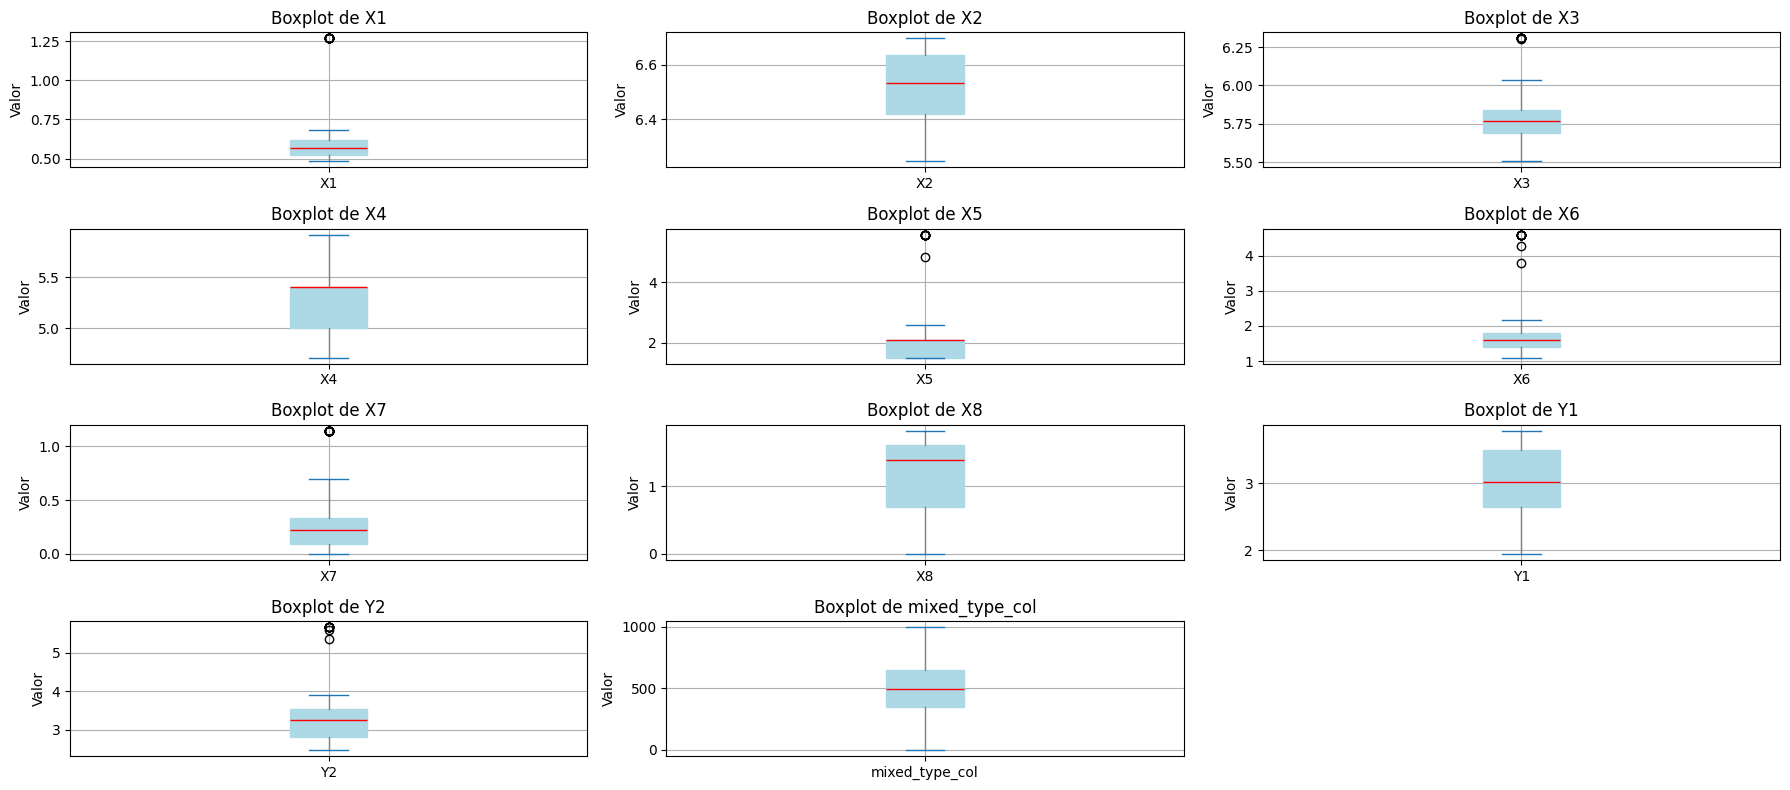

In [ ]:
boxplots(df_transformed)

Según la descripción del conjunto de datos, las columnas $X6$ y $X8$ sugieren contener datos categóricos representados numéricamente, ya que corresponden a variables discretas como orientación y distribución del área de acristalamiento.
En contraste, el resto de las columnas presentan valores continuos, lo que indica que su tipo de dato es numérico de tipo flotante (`float`), adecuado para análisis estadísticos y modelado energético.

In [ ]:
def plot_histograms(df, cols=None, bins=20, figsize=(20, 10)):
    # Seleccionar columnas
    if cols is None:
        cols = df.select_dtypes(include='number').columns.tolist()

    n_cols = len(cols)

    # Calcular layout dinámico (aprox cuadrado)
    nrows = math.ceil(math.sqrt(n_cols))
    ncols = math.ceil(n_cols / nrows)

    # Crear figura
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]

        sns.histplot(data=df, x=col, bins=bins, kde=True,
                     color='skyblue', edgecolor='black', ax=ax)

        media = df[col].mean()
        mediana = df[col].median()
        desviacion = df[col].std()

        ax.axvline(media, color='red', linestyle='--', linewidth=1.5)
        ax.axvline(mediana, color='green', linestyle='--', linewidth=1.5)

        texto = (
            f"Media: {media:.2f}\n"
            f"Mediana: {mediana:.2f}\n"
            f"Desv. Std: {desviacion:.2f}"
        )
        ax.text(0.95, 0.95, texto,
                transform=ax.transAxes, ha='right', va='top',
                fontsize=9, bbox=dict(facecolor='white', edgecolor='gray'))

        ax.set_title(f'Histograma + KDE de {col}')
        ax.set_xlabel('Valor')
        ax.set_ylabel('Frecuencia / Densidad')
        ax.grid(True)

    # Desactivar ejes vacíos si sobran
    for j in range(n_cols, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

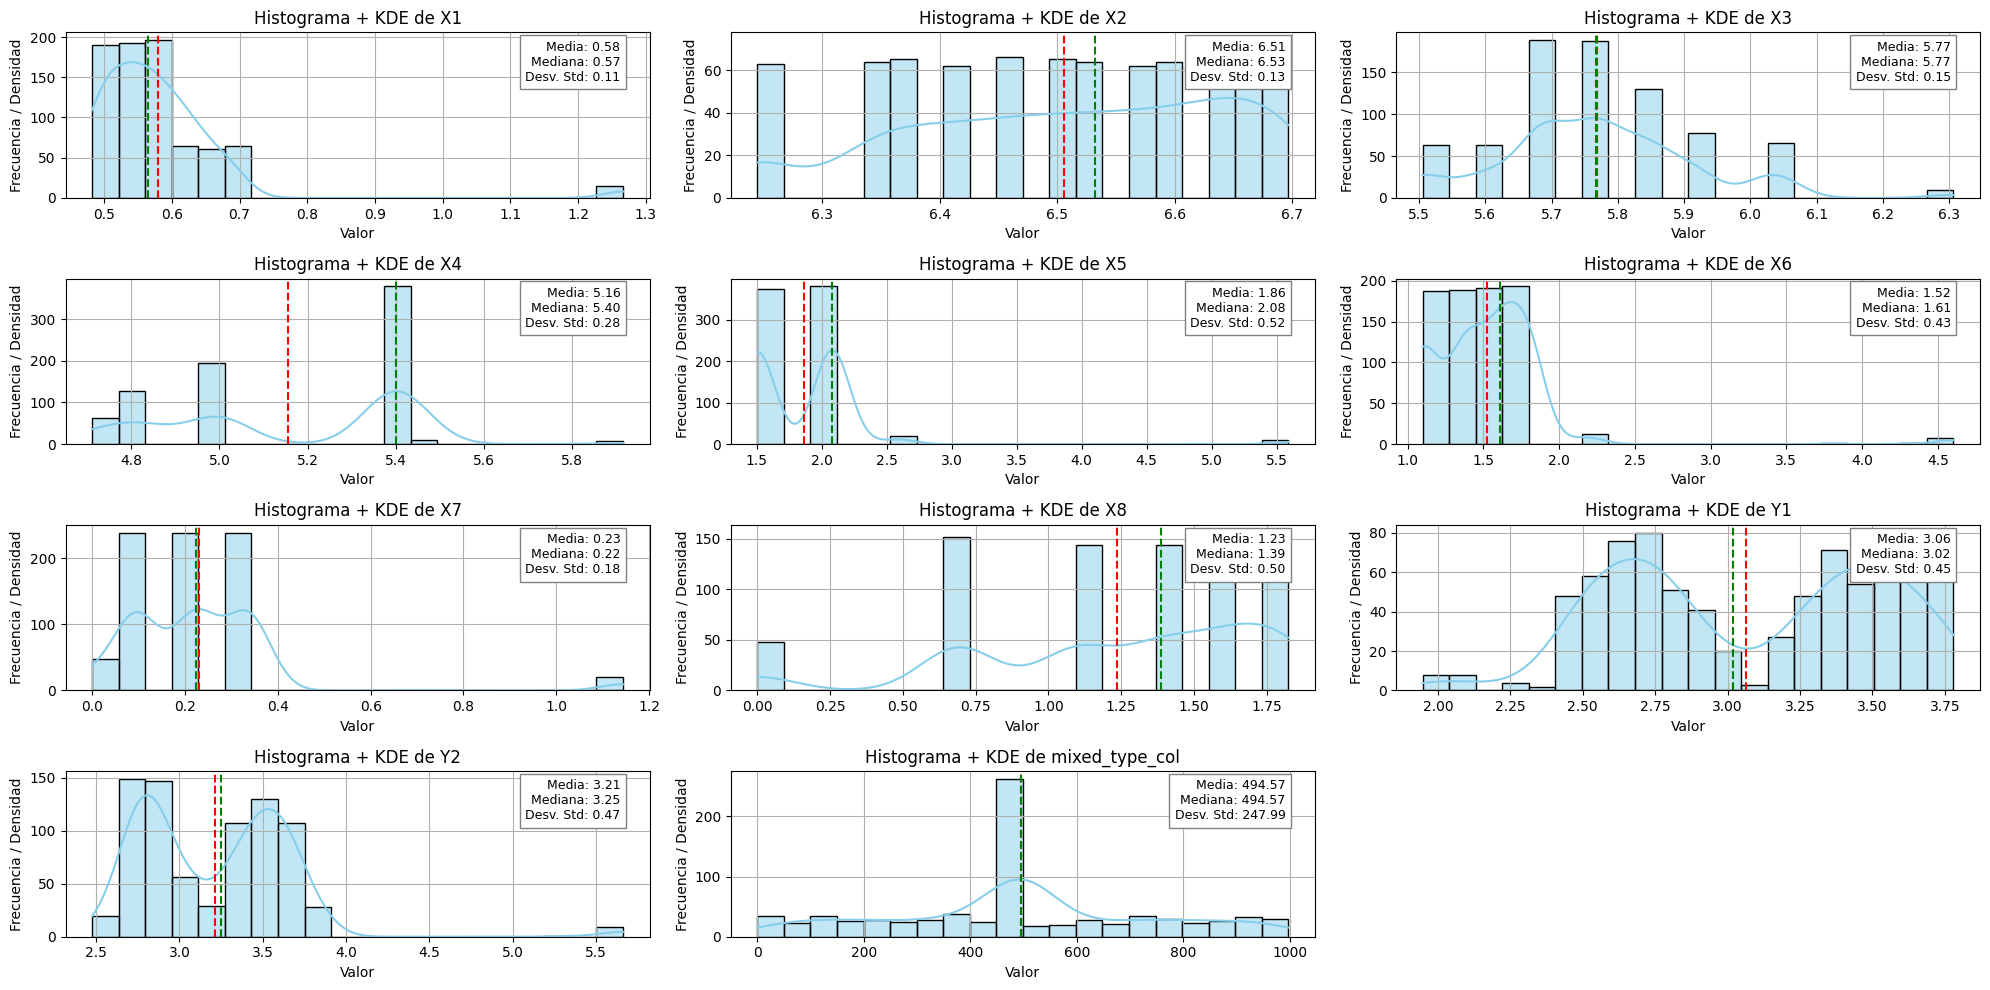

In [ ]:
plot_histograms(df_transformed)

## 2.3 Análisis bivariante

In [ ]:
def plot_scatter_vs_target(df, features, target):
    n = len(features)

    # Calcular layout (cuadrado aproximado)
    nrows = math.ceil(math.sqrt(n))
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(32, 18))
    axes = axes.flatten()

    for i, col in enumerate(features):
        axes[i].scatter(df[col], df[target], alpha=0.5)
        axes[i].set_title(f"{col} vs {target}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target)

    # Apagar ejes sobrantes
    for j in range(n, len(axes)):
        axes[j].axis("off")

    plt.suptitle(f"Relación de features con {target}", fontsize=16)
    plt.tight_layout()
    plt.show()


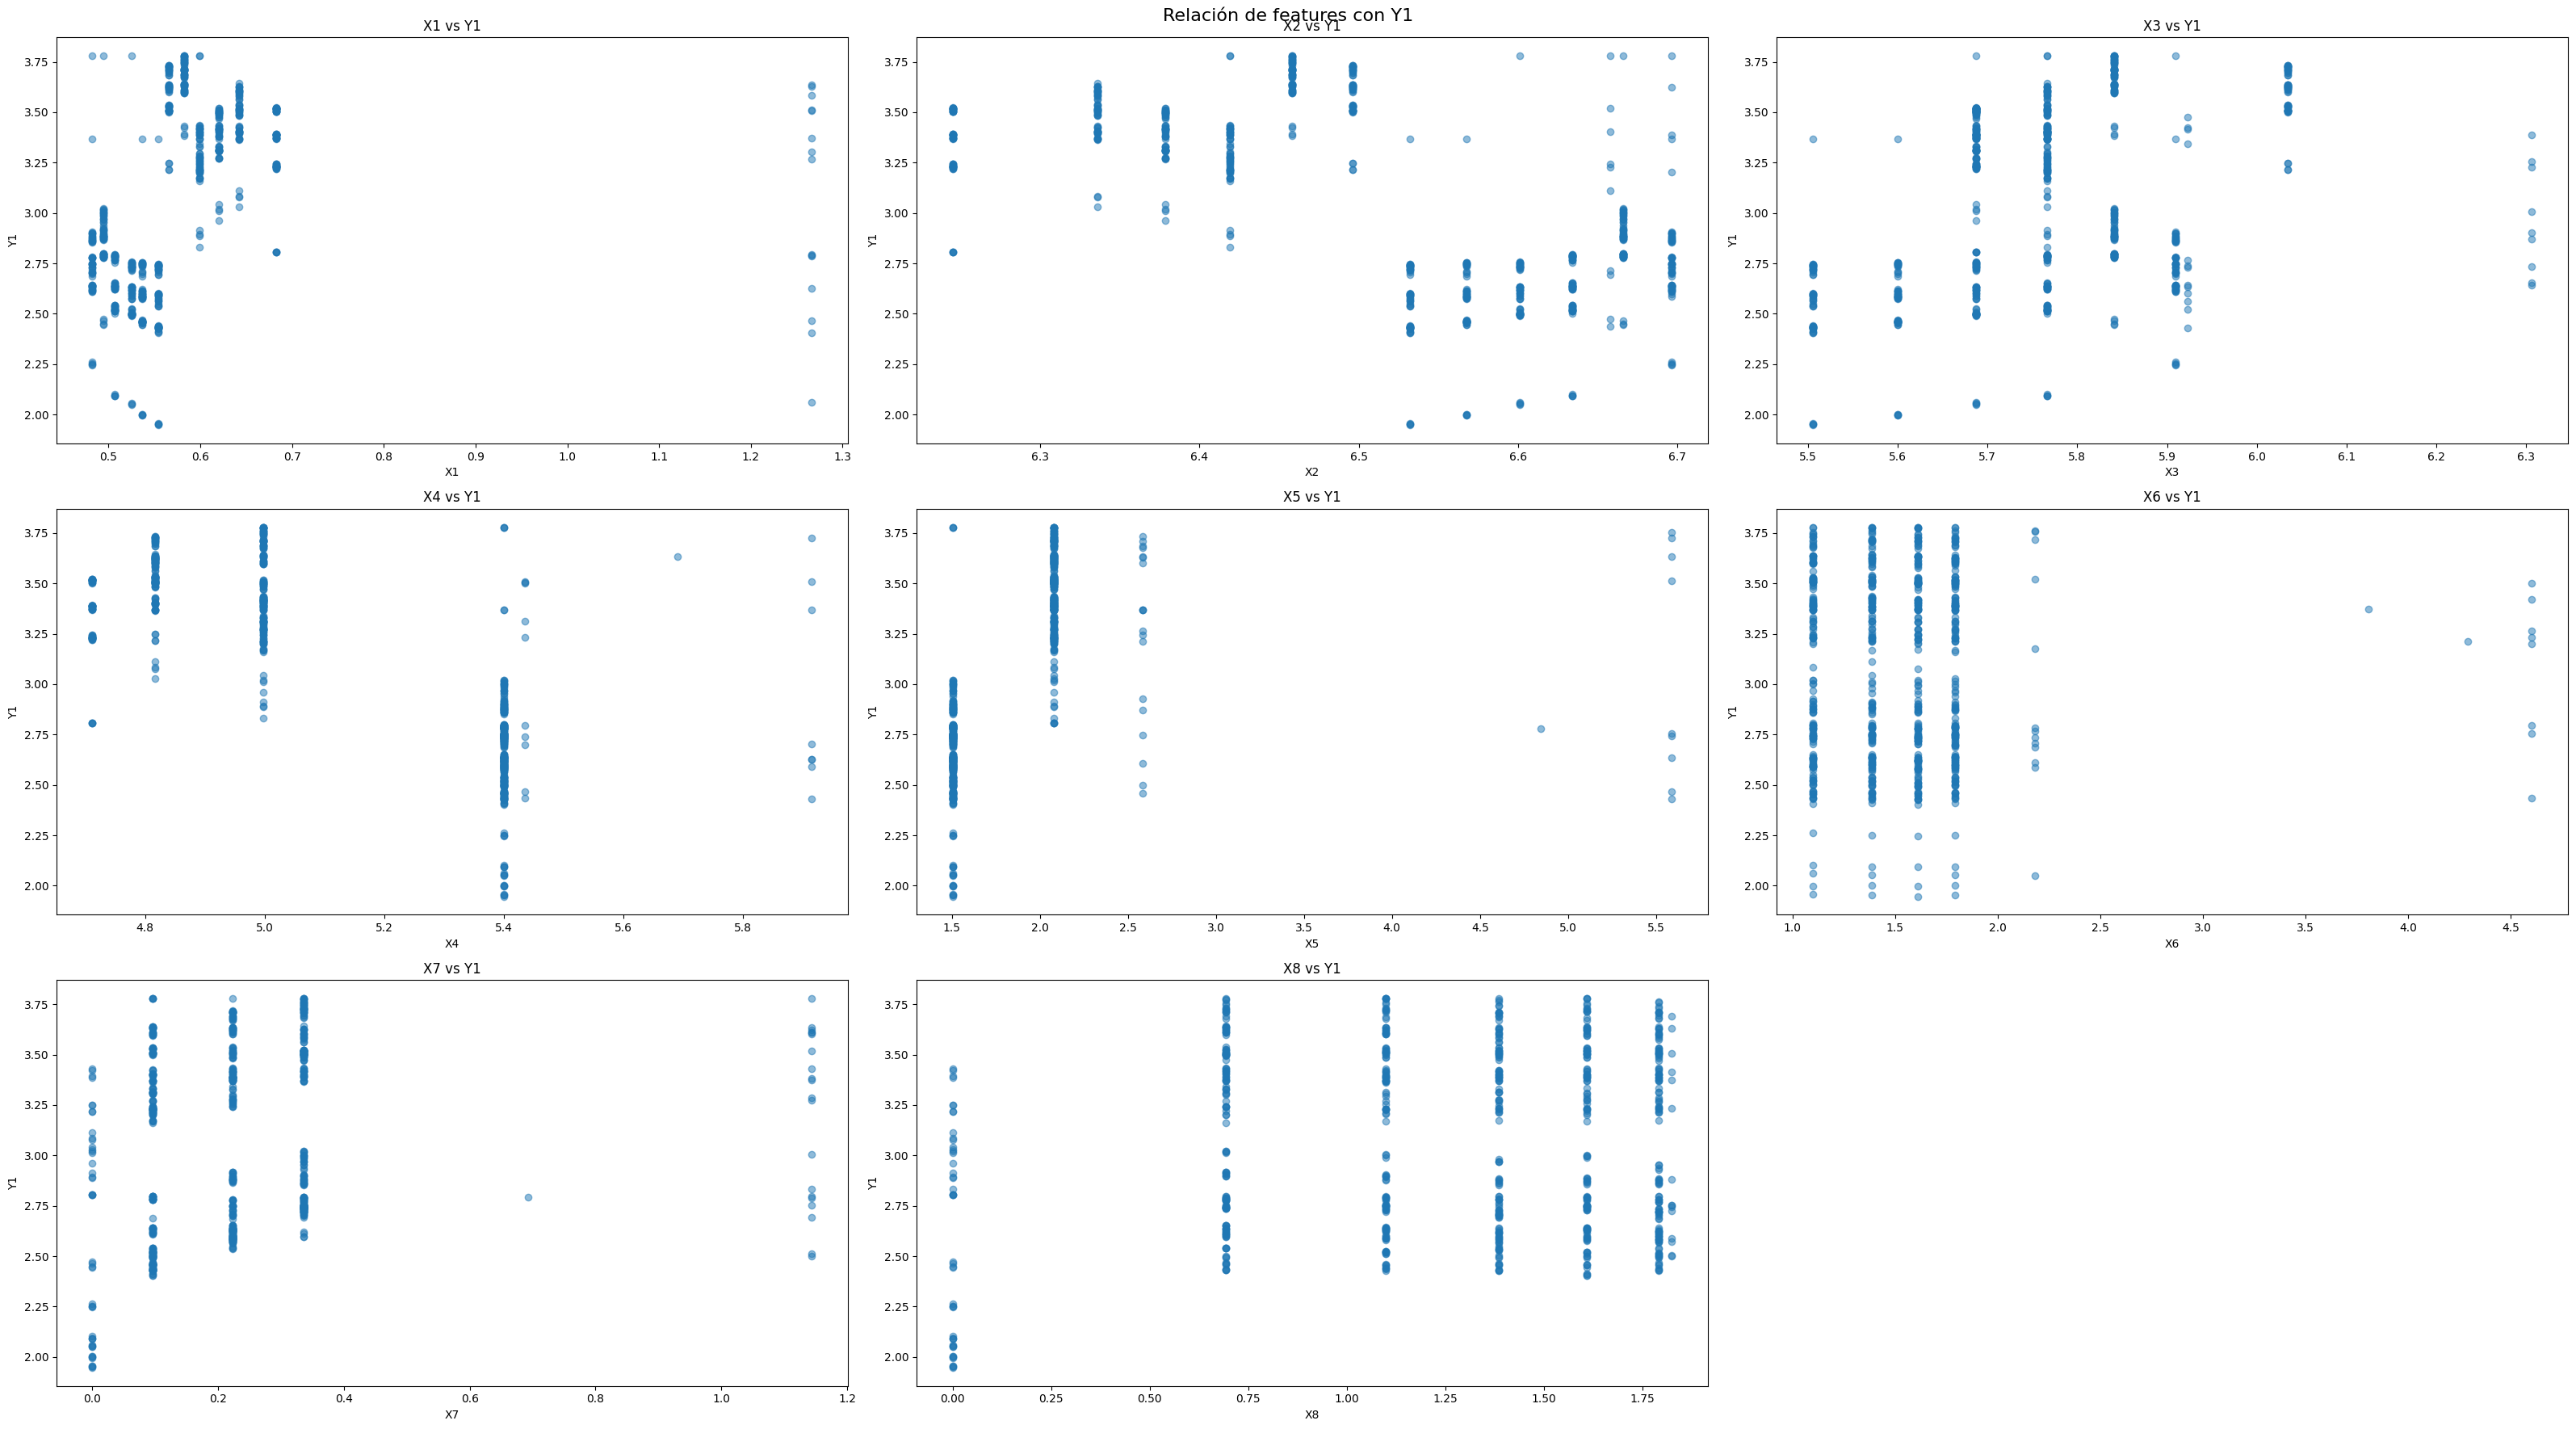

In [ ]:
x_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Scatter con Y1
plot_scatter_vs_target(df_transformed, x_cols, "Y1")

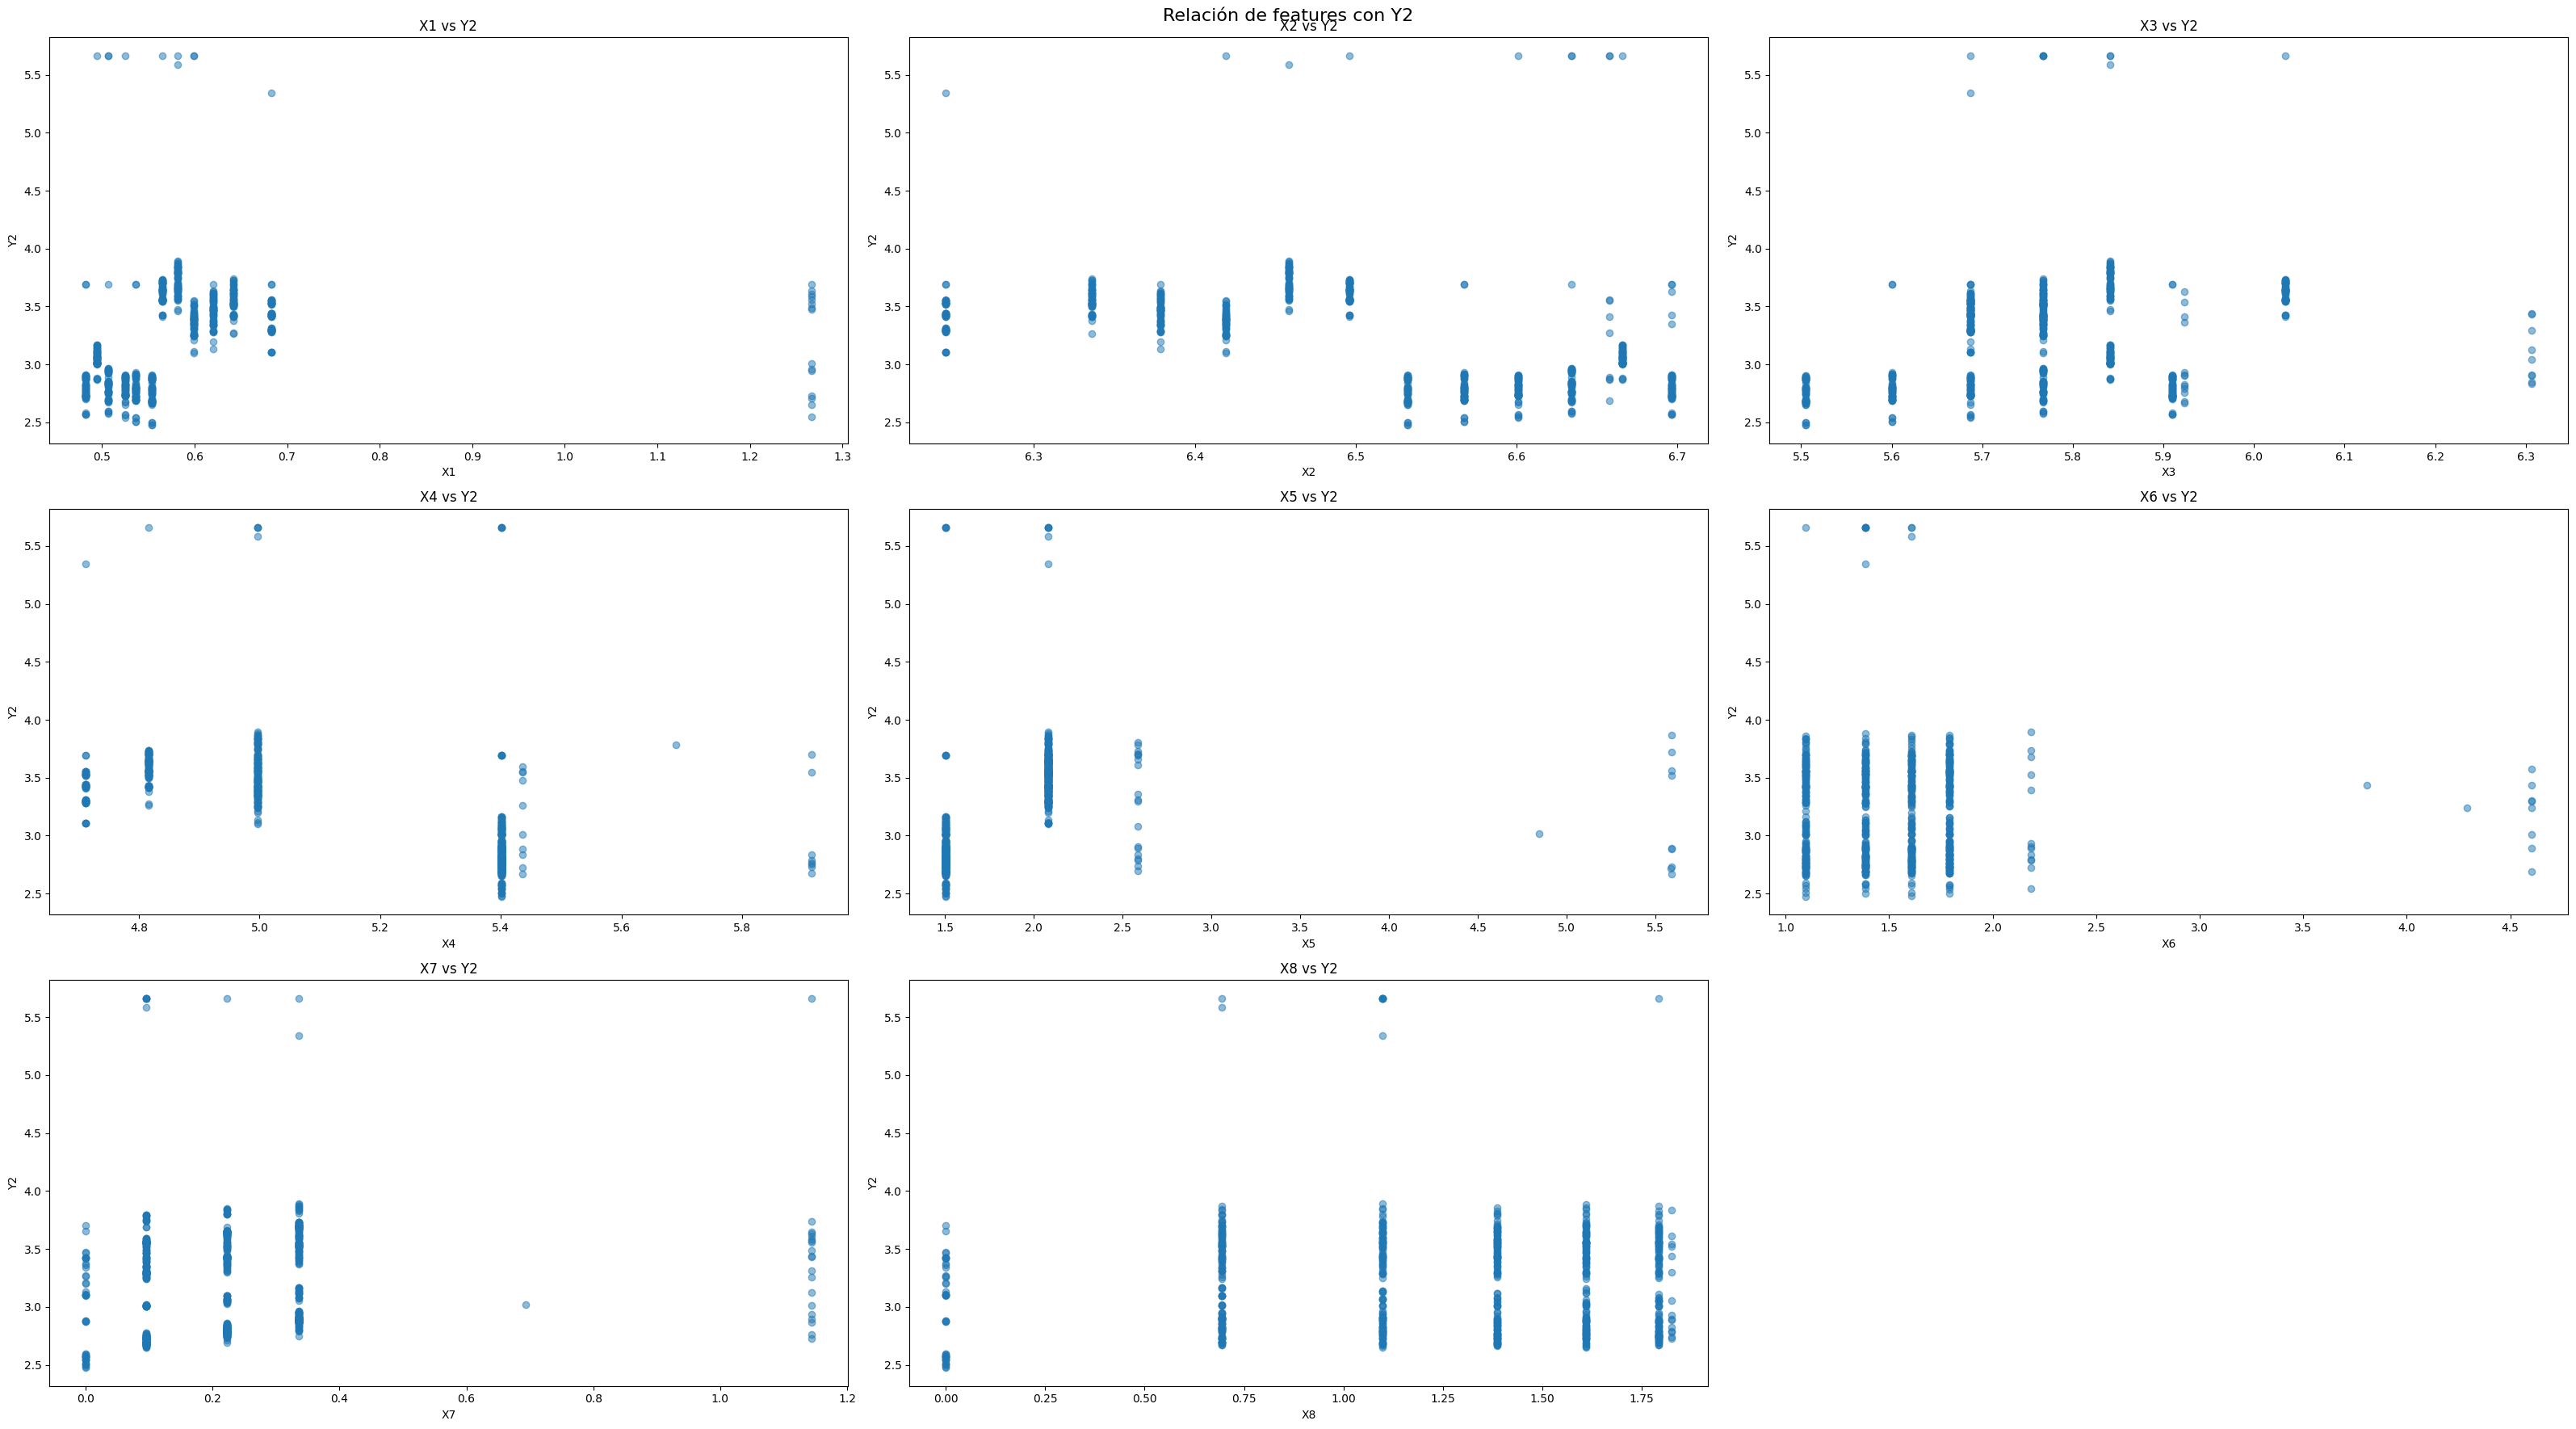

In [ ]:
# Scatter con Y2
plot_scatter_vs_target(df_transformed, x_cols, "Y2")

# 3. Exploración y preprocesamiento de datos

## 3.1 Normalización y codificación de variables categóricas

Variables de entrada (X):
  - Variables numéricas continuas: X1, X2, X3, X4, X5 (superficie, compacidad, áreas, altura). Aquí sí aplica normalización o estandarización.

  - Variables categóricas discretas: X6, X7, X8 (orientación, área de acristalamiento y distribución del área de acristalamiento) aunque están codificadas con números, en realidad se comportan más como  categorías. Estas columnas deben tratarse como categóricas (con el uso de *One-Hot Encoding*), no escalarse como números.
    - X6: orientación (norte, sur, este, oeste).
    - X7: porcentaje de acristalamiento (0%, 10%, 25%, 40%).
    - X8: distribución del acristalamiento (uniforme, norte, este, sur, oeste).


**Proceso de normalización y codificación:**
  - Escalar solo las columnas numéricas (X1-X5) con StandardScaler (media=0, varianza=1).
  - Transformar X6, X7, X8 a dummies.
  - Combinar ambas transformaciones con un ColumnTransformer.

In [ ]:
# Separar features (X) y target (Y)
X = df_transformed.drop(columns=["Y1", "Y2", "mixed_type_col"])
y = df_transformed[["Y1", "Y2"]]

# Definir columnas numéricas y categóricas
num_features = ["X1", "X2", "X3", "X4", "X5"]
cat_features = ["X6", "X7", "X8"]

# Reemplazar valores numéricos por categorías discretas
# Redondear y convertir a categoría
for col in ["X6", "X7", "X8"]:
    X[col] = X[col].astype("category").cat.codes

# Preprocesamiento escalado y one-hot encoding para X
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(drop="first"), cat_features)
    ]
)

# Construir pipeline para X
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

# Transformar X
X_processed = pipeline.fit_transform(X)

# Discretizar y en 4 clases (cuartiles)
# con el objetico de utilizar modelos que permitan tratar al problema como uno de clasificación multiclase
# en este caso se manejan 4 clases de las dos variables para clasificar a un edificio en una de esas clases
# qcut obtienes categorías ordenadas y equilibradas en tamaño
y_class = pd.DataFrame({
    "Y1_class": pd.qcut(y["Y1"], q=4, labels=False),
    "Y2_class": pd.qcut(y["Y2"], q=4, labels=False)
})

print("Y1 número de clases:", y_class["Y1_class"].value_counts())
print("Y2 número de clases:", y_class["Y2_class"].value_counts())

# Revisar resultados
print("X shape original:", X.shape)
print("X shape transformado:", X_processed.shape)

Y1 número de clases: Y1_class
0    197
3    196
2    195
1    195
Name: count, dtype: int64
Y2 número de clases: Y2_class
0    197
3    196
2    195
1    195
Name: count, dtype: int64
X shape original: (783, 8)
X shape transformado: (783, 23)


In [ ]:
# Convertir X de nuevo a DataFrame con nombres de columnas
encoded_cat_cols = pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(cat_features)
all_cols = num_features + list(encoded_cat_cols)
X_processed_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
                              columns=all_cols)

X_processed_df.head()

,X1,X2,X3,X4,X5,X6_1,X6_2,X6_3,X6_4,X6_5,...,X7_2,X7_3,X7_4,X7_5,X8_1,X8_2,X8_3,X8_4,X8_5,X8_6
0,0.923242,-1.942662,-0.554218,-1.596727,0.422478,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.923242,-1.942662,-0.554218,-1.596727,0.422478,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.923242,-1.942662,-0.554218,-1.596727,0.422478,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.923242,-1.942662,-0.554218,-1.596727,0.422478,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.556247,-1.266620,-0.011500,-1.220545,0.422478,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Concatenar todo en un solo DataFrame
df_final = pd.concat([X_processed_df, y.reset_index(drop=True), y_class.reset_index(drop=True)], axis=1)

df_final.head()

,X1,X2,X3,X4,X5,X6_1,X6_2,X6_3,X6_4,X6_5,...,X8_1,X8_2,X8_3,X8_4,X8_5,X8_6,Y1,Y2,Y1_class,Y2_class
0,0.923242,-1.942662,-0.554218,-1.596727,0.422478,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.806386,3.105931,1,1
1,0.923242,-1.942662,-0.554218,-1.596727,0.422478,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.806386,3.105931,1,1
2,0.923242,-1.942662,-0.554218,-1.596727,0.422478,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.806386,3.105931,1,1
3,0.923242,-1.942662,-0.554218,-1.596727,0.422478,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.806386,3.105931,1,1
4,0.556247,-1.266620,-0.011500,-1.220545,0.422478,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.083743,3.376905,2,2


## 3.2 Visualizaciones

### a) Histogramas

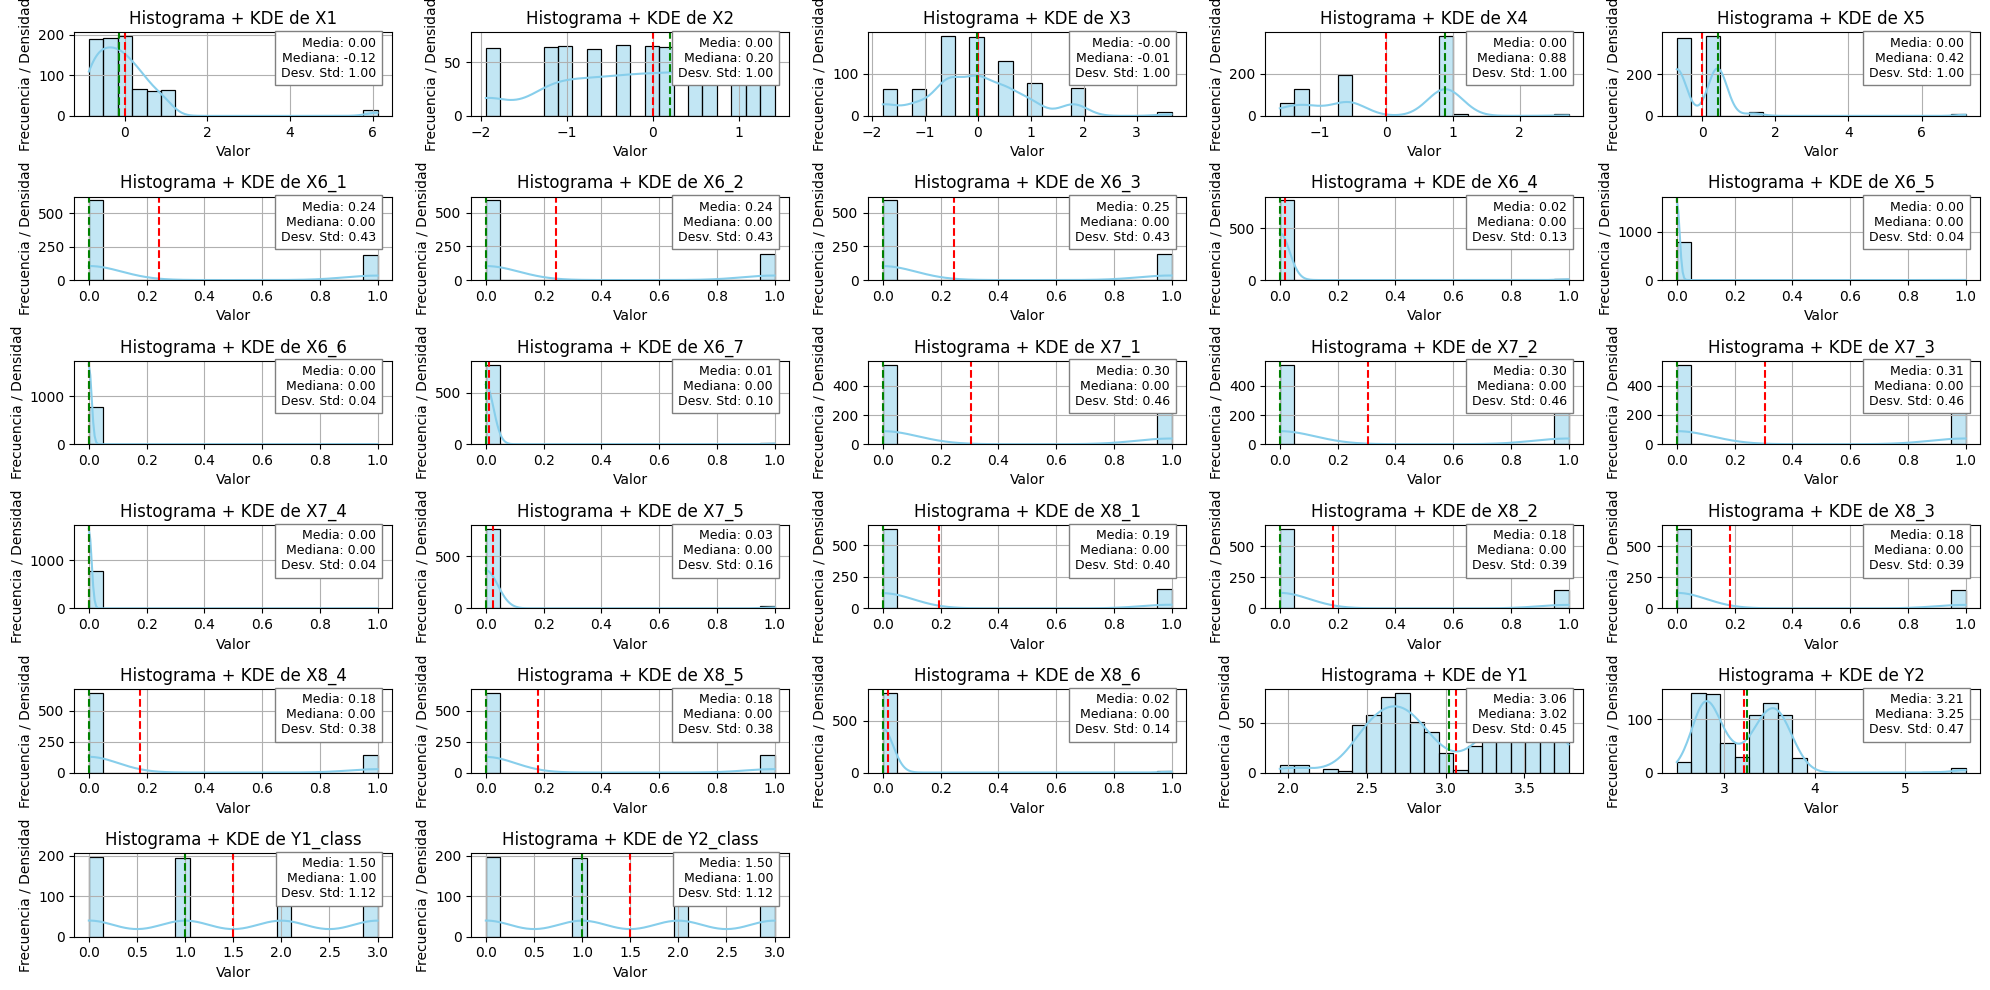

In [ ]:
plot_histograms(df_final)

### b) Scatter plots: relación de cada X con Y1 y Y2 (originales)

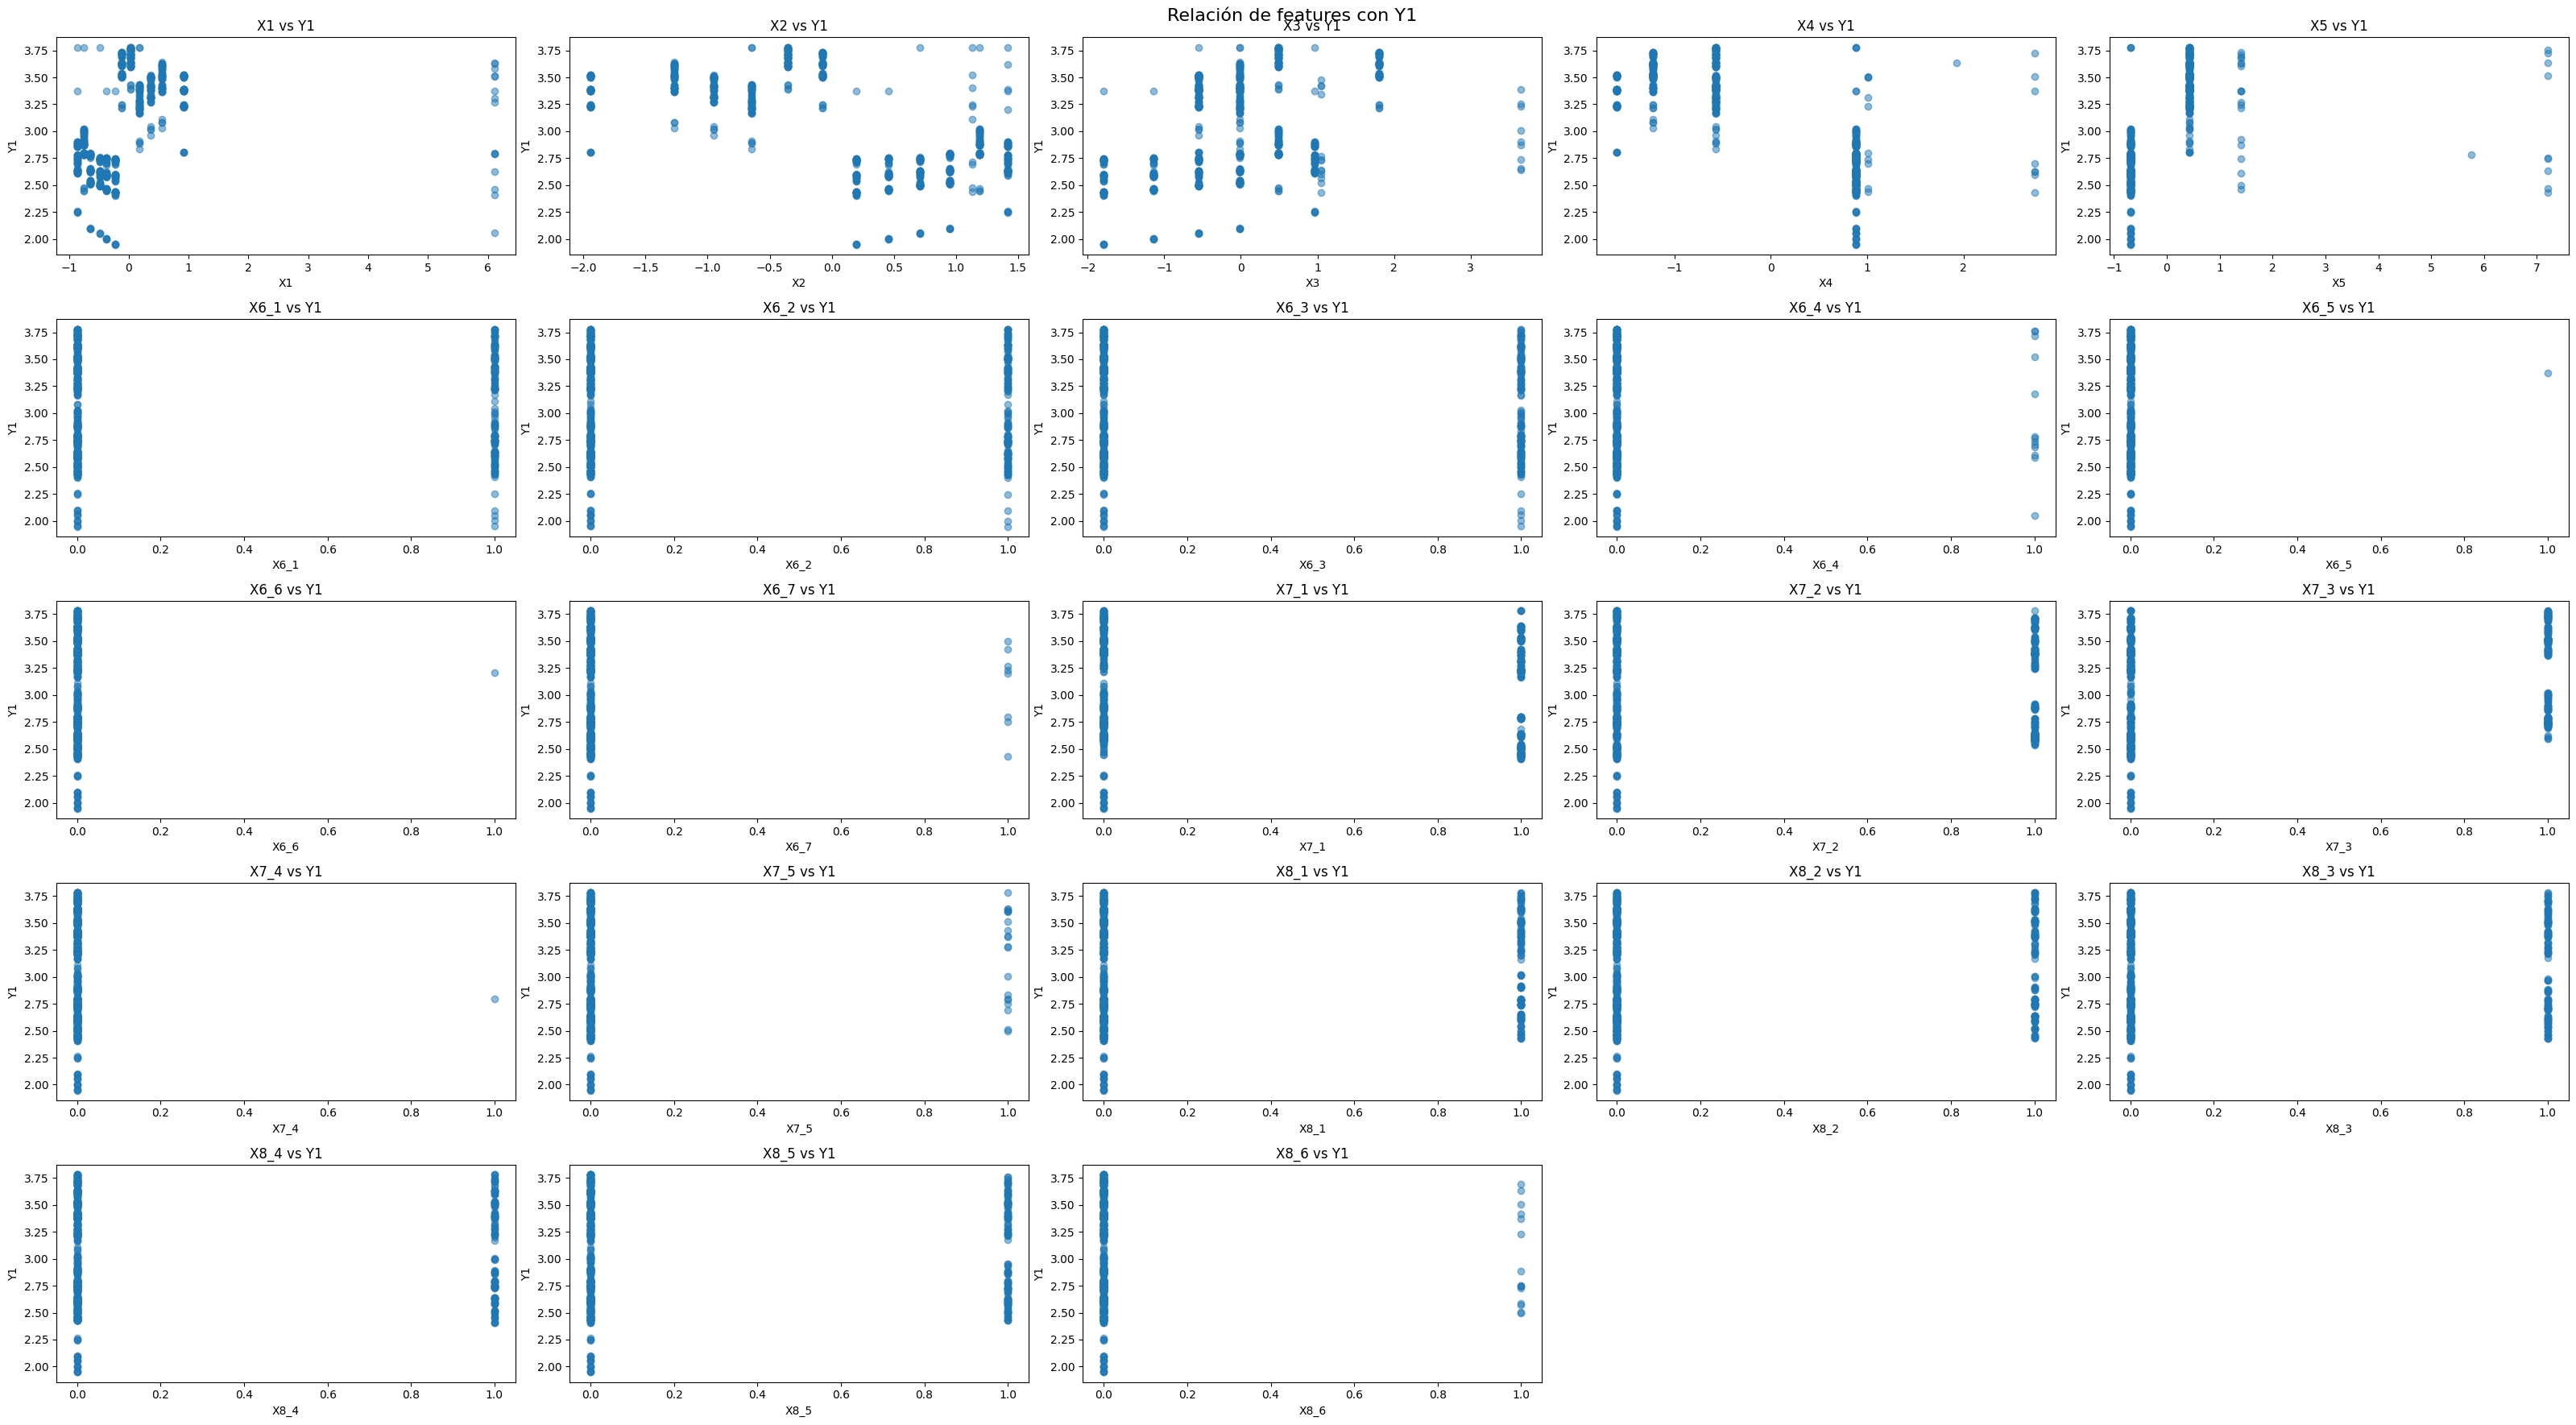

In [ ]:
# Scatter con Y1
plot_scatter_vs_target(df_final, X_processed_df.columns.tolist(), "Y1")

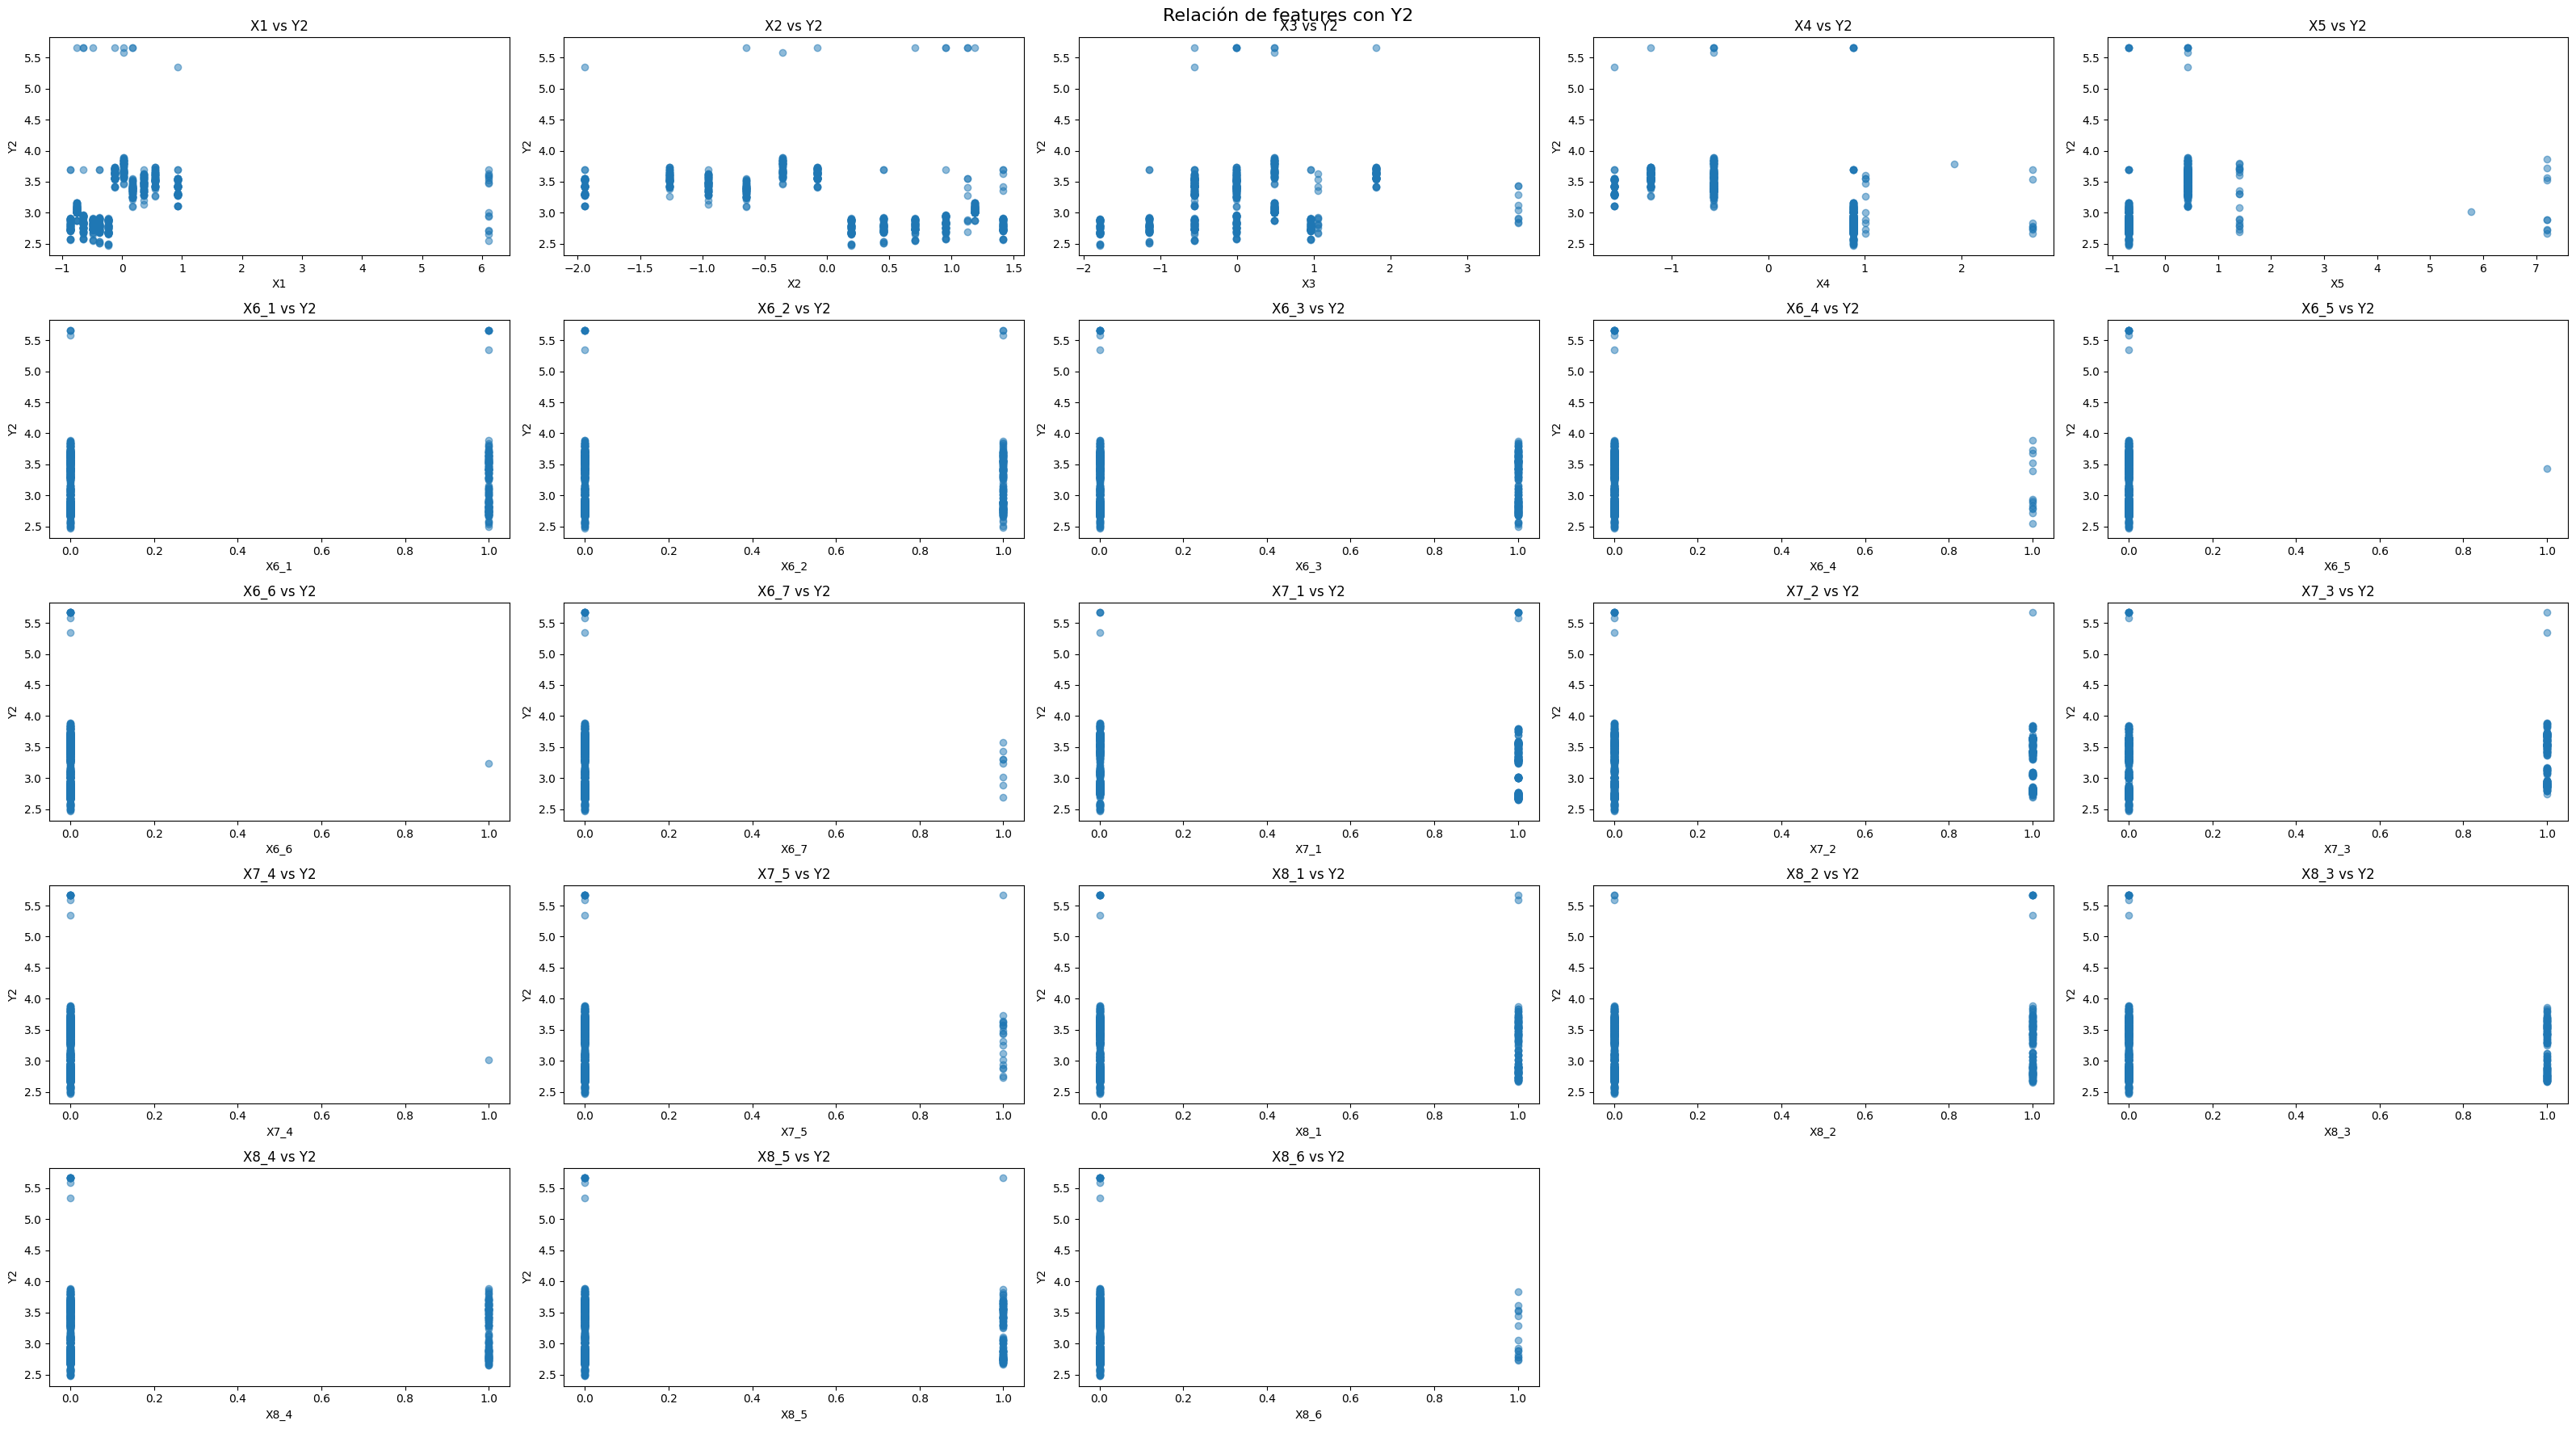

In [ ]:

# Scatter con Y2
plot_scatter_vs_target(df_final, X_processed_df.columns.tolist(), "Y2")

### c) Correlación entre X y Y

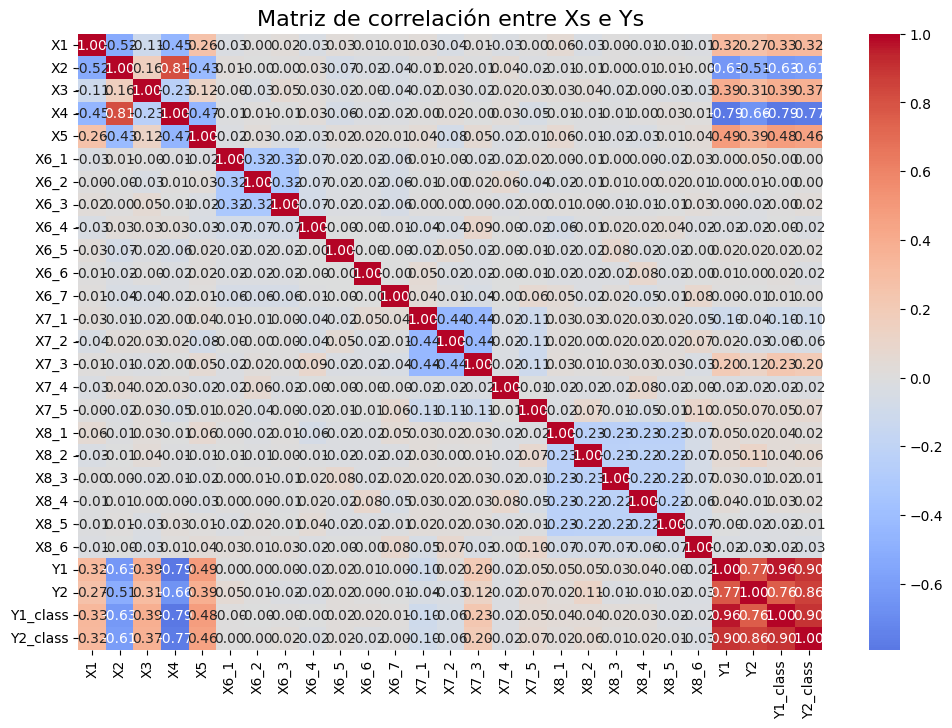

In [ ]:
# Correlación entre X procesadas y los Y originales
plt.figure(figsize=(12, 8))
sns.heatmap(df_final.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación entre Xs e Ys", fontsize=16)
plt.show()

# 4. Construcción, ajuste y evaluación de Modelos de Machine Learning

## 4.1. Regresión Lineal

In [ ]:
# Preparar datos
X = df_final.drop(columns=["Y1", "Y2", "Y1_class", "Y2_class"])
y1 = df_final["Y1"]
y2 = df_final["Y2"]

In [ ]:
def linear_regression(X, y, test_size=0.2, random_state=42, target_name="Y"):
    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Entrenamiento
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Predicción
    y_pred = lr.predict(X_test)

    # Reporte
    print(f"=== Regresión Lineal (OLS) para {target_name} ===")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))
    print()

    return lr, y_pred

In [ ]:
model, y1_pred = linear_regression(X, y1, target_name="Y1")

=== Regresión Lineal (OLS) para Y1 ===
MAE: 0.14255145250336915
MSE: 0.04680002314453686
R²: 0.7862250358936073



In [ ]:
model, y1_pred = linear_regression(X, y2, target_name="Y2")

=== Regresión Lineal (OLS) para Y2 ===
MAE: 0.1830064716257648
MSE: 0.1461541468605488
R²: 0.4306029723296855



## 4.2. Random Forest Clasificador

In [ ]:
# Preparar datos
y1_class = df_final["Y1_class"]
y2_class = df_final["Y2_class"]

In [ ]:
def random_forest_classification(X, y, test_size=0.2, random_state=42, param_grid=None):
    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Configuración del clasificador
    rf_clf = RandomForestClassifier(random_state=random_state)

    # Parámetros por defecto si no se pasan
    if param_grid is None:
        param_grid = {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5, 10]
        }

    # GridSearchCV
    grid_clf = GridSearchCV(
        rf_clf, param_grid, cv=5, scoring="accuracy", n_jobs=-1
    )
    grid_clf.fit(X_train, y_train)

    # Mejor modelo y predicciones
    best_rf_clf = grid_clf.best_estimator_
    y_pred = best_rf_clf.predict(X_test)

    # Resultados
    print("=== Random Forest Clasificador ===")
    print("Mejores parámetros:", grid_clf.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    return best_rf_clf, y_pred

In [ ]:
best_model, y_pred = random_forest_classification(X, y1_class)

=== Random Forest Clasificador ===
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9171974522292994
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       0.94      0.87      0.90        38
           2       0.89      0.89      0.89        38
           3       0.95      0.91      0.93        44

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157



In [ ]:
best_model, y_pred = random_forest_classification(X, y2_class)

=== Random Forest Clasificador ===
Mejores parámetros: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.821656050955414
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.89      0.87      0.88        38
           2       0.63      0.92      0.75        36
           3       0.90      0.59      0.71        44

    accuracy                           0.82       157
   macro avg       0.84      0.83      0.82       157
weighted avg       0.85      0.82      0.82       157

